In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf
import os

from AtlasCommonUtils import SetAtlasStyle
from ROOT import TLatex



rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)




#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

Welcome to JupyROOT 6.22/02


In [2]:
# Define default plot styles
plot_style_0 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'linestyle': '--',
    'density': True
}

plot_style_1 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'density': True
}

plot_style_2 = {'alpha': 0.5, 'density': True}

In [3]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print (text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut))
    return cutDataframe

In [4]:
def getJetData(inputFiles, isMC=False):
    
    cols = []
    scalar = []

    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('e_px')
    scalar.append('e_py')
    #scalar.append('tau1b')
    cols.append('track_jt')
    cols.append('track_z')

    cols.append('track_jetpx')
    cols.append('track_jetpy')
    if(isMC):
        scalar.append('gen_x')
        scalar.append('gen_y')
        #scalar.append('gen_tau1b')
        scalar.append('gen_Q2')
        scalar.append('gene_px')
        scalar.append('gene_py')
        cols.append('gen_track_jt')
        cols.append('gen_track_z')
        cols.append('gen_track_jetpx')
        cols.append('gen_track_jetpy')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print ('\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds')
    return pd.concat([x for x in dataframes])

In [47]:
def applyCutsJets(df,isMC=False):
    temp = df
    #temp = applyCut(temp, 'abs(vertex_z)<25 and vertex_z!=0','abs(vertex_z)<25 and and vertex_z!=0')
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    #temp = applyCut(temp, 'tau1b>0 and tau1b<1', '0<tau1b<1')
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('track_jetpt = sqrt(track_jetpx*track_jetpx + track_jetpy*track_jetpy)', inplace=True)
    temp.eval('track_jetqt = sqrt( (e_px+track_jetpx)**2 + (e_py+track_jetpy)**2)',inplace=True)
    temp.eval('track_jetqtnorm = track_jetqt/sqrt(Q2)',inplace=True)
    #temp = applyCut(temp, 'e_pt>15', 'e_pt >15')
    #temp = applyCut(temp, 'jet_pt>10', 'jet_pt>10')
   # temp = applyCut(temp, 'isBKG<1.0', 'isBKG')

    #temp = applyCut(temp, 'jet_qt<5', 'jet_qt<5')

    #temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    temp = applyCut(temp, 'pass_reco==0 or track_jetpt >10.0', ' jet pt>10.0')
    
    #temp.eval('dphi = 3.14159-jet_dphi', inplace=True)
    #temp.eval('jet_qtnormjetpt= jet_qt/jet_pt', inplace=True)
    #temp.eval('jet_qtnormept= jet_qt/e_pt', inplace=True)
    if(isMC):
        temp.eval('gen_logQ2= log(gen_Q2)/2.3025850', inplace=True)
        temp.eval('gen_track_jetpt = sqrt(gen_track_jetpx*gen_track_jetpx + gen_track_jetpy*gen_track_jetpy)', inplace=True)
        temp.eval('gen_track_jetqt = sqrt( (gene_px+gen_track_jetpx)**2 + (gene_py+gen_track_jetpy)**2)',inplace=True)
        temp.eval('gen_track_jetqtnorm = gen_track_jetqt/sqrt(gen_Q2)',inplace=True)
    #    temp.eval('genjet_qtnormept= genjet_qt/e_pt', inplace=True)
    #    temp.eval('genjet_qtnormjetpt= genjet_qt/genjet_pt', inplace=True)


    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

## Get dataframes, apply selection

In [6]:
path = '/home/miguel/HERA/out_em0405/'
dataname = path+'data.root'
mcname = path+'Django.root'
altmcname = path+'Rapgap.root'

In [7]:
data     = getJetData([dataname])
#mc       = getJetData([mcname],isMC=True)
#altmc    = getJetData([altmcname],isMC=True)


 Processed /home/miguel/HERA/out_em0405/data.root in 2.5 seconds


## Get Nominal MC (Django in this case )

In [9]:
mc = None
for filename in os.listdir(path):
    if 'Django_' in filename:
        print (filename)
        temp = getJetData([path+filename],isMC=True)
        #print (len(temp))
        mc = pd.concat([mc,temp])
        #print(len(mc))


Django_Eminus0405_134.root

 Processed /home/miguel/HERA/out_em0405/Django_Eminus0405_134.root in 5.0 seconds
Django_Eminus0405_125.root

 Processed /home/miguel/HERA/out_em0405/Django_Eminus0405_125.root in 4.5 seconds
Django_Eminus0405_117.root

 Processed /home/miguel/HERA/out_em0405/Django_Eminus0405_117.root in 4.9 seconds
Django_Eminus0405_10.root

 Processed /home/miguel/HERA/out_em0405/Django_Eminus0405_10.root in 5.5 seconds
Django_Eminus0405_110.root

 Processed /home/miguel/HERA/out_em0405/Django_Eminus0405_110.root in 5.1 seconds
Django_Eminus0405_104.root

 Processed /home/miguel/HERA/out_em0405/Django_Eminus0405_104.root in 2.2 seconds
Django_Eminus0405_123.root

 Processed /home/miguel/HERA/out_em0405/Django_Eminus0405_123.root in 5.1 seconds
Django_Eminus0405_139.root

 Processed /home/miguel/HERA/out_em0405/Django_Eminus0405_139.root in 2.6 seconds
Django_Eminus0405_122.root

 Processed /home/miguel/HERA/out_em0405/Django_Eminus0405_122.root in 4.8 seconds
Django_Eminu

## Get alternative MC

In [8]:
altmc = None
for filename in os.listdir(path):
    if 'Rapgap_' in filename:
        print (filename)
        temp = getJetData([path+filename],isMC=True)
        altmc = pd.concat([altmc,temp])


Rapgap_Eminus0405_127.root

 Processed /home/miguel/HERA/out_em0405/Rapgap_Eminus0405_127.root in 2.4 seconds
Rapgap_Eminus0405_101.root


ValueError: No trees found in /home/miguel/HERA/out_em0405/Rapgap_Eminus0405_101.root

In [10]:
#mc       = getJetData([mcname],isMC=True)
altmc    = getJetData([altmcname],isMC=True)


 Processed /home/miguel/HERA/out_em0405/Rapgap.root in 153.1 seconds


In [ ]:
mc['pass_reco'] = np.where(mc['Q2']>0, 1, 0)
mc['pass_truth'] = np.where(mc['gen_Q2']>0, 1, 0)
data['pass_reco'] = np.where(data['Q2']>0, 1, 0)

In [48]:
mc['pass_reco'] = np.where(mc['track_jt']>0, 1, 0)
mc['pass_truth'] = np.where(mc['gen_track_jt']>0, 1, 0)
altmc['pass_reco'] = np.where(altmc['track_jt']>0, 1, 0)
altmc['pass_truth'] = np.where(altmc['gen_track_jt']>0, 1, 0)
data['pass_reco'] = np.where(data['track_jt']>0, 1, 0)

In [49]:
mc.head()

,x,y,Q2,e_px,e_py,gen_x,gen_y,gen_Q2,gene_px,gene_py,...,pass_reco,pass_truth,logQ2,track_jetpt,track_jetqt,track_jetqtnorm,gen_logQ2,gen_track_jetpt,gen_track_jetqt,gen_track_jetqtnorm
15,0.004595,0.522167,243.716019,-10.744534,1.031549,0.004238,0.541032,232.882782,-10.290491,0.995728,...,1,1,2.386884,15.437574,7.196029,0.460947,2.367138,17.165714,8.585911,0.562623
16,0.004595,0.522167,243.716019,-10.744534,1.031549,0.004238,0.541032,232.882782,-10.290491,0.995728,...,1,1,2.386884,15.437574,7.196029,0.460947,2.367138,17.165714,8.585911,0.562623
17,0.004595,0.522167,243.716019,-10.744534,1.031549,0.004238,0.541032,232.882782,-10.290491,0.995728,...,1,1,2.386884,15.437574,7.196029,0.460947,2.367138,17.165714,8.585911,0.562623
18,0.004595,0.522167,243.716019,-10.744534,1.031549,0.004238,0.541032,232.882782,-10.290491,0.995728,...,1,1,2.386884,15.437574,7.196029,0.460947,2.367138,17.165714,8.585911,0.562623
19,0.004595,0.522167,243.716019,-10.744534,1.031549,0.004238,0.541032,232.882782,-10.290491,0.995728,...,1,1,2.386884,15.437574,7.196029,0.460947,2.367138,17.165714,8.585911,0.562623


In [50]:
print('Selecting data events\n')
data = applyCutsJets(data)
print('Selecting MC events\n')
mc   = applyCutsJets(mc, isMC=True)
print('alt mc')
altmc = applyCutsJets(altmc, isMC=True)

Selecting data events

0.2 < y < 0.7 644756  fraction kept: 100.0
Q2>150 644756  fraction kept: 100.0
 jet pt>10.0 519391  fraction kept: 80.6
Selecting MC events

0.2 < y < 0.7 24509238  fraction kept: 100.0
Q2>150 24509238  fraction kept: 100.0
 jet pt>10.0 21119309  fraction kept: 86.2
alt mc
0.2 < y < 0.7 30740278  fraction kept: 100.0
Q2>150 30740278  fraction kept: 100.0
 jet pt>10.0 26413380  fraction kept: 85.9


In [51]:
mc_cut = mc[:600000]
altmc_cut = altmc[:200000]

In [52]:
print(len(data))
print(len(mc_cut.query('pass_reco==1'))) ##only what is really reconstructed counts
print(len(mc_cut)) ##only what is really reconstructed counts

519391
454658
600000


### Define UniFold Algorithm


In [53]:
from __future__ import absolute_import, division, print_function

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
import keras.backend as K
from keras.layers import Dense, Input
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

## Define features using just MC and alt MC *this is CLOSURE TEST*

In [54]:
Q2_0_G = mc_cut['gen_logQ2']
Q2_0_S =mc_cut['logQ2']
Q2_unknown_G = altmc_cut['gen_logQ2']
Q2_unknown_S = altmc_cut['logQ2']

y_0_G = mc_cut['gen_y']
y_0_S =mc_cut['y']
y_unknown_G = altmc_cut['gen_y']
y_unknown_S = altmc_cut['y']

#tau1b_0_G = mc_cut['gen_tau1b']
#tau1b_0_S =mc_cut['tau1b']
#tau1b_unknown_G = altmc_cut['gen_tau1b']
#tau1b_unknown_S = altmc_cut['tau1b']

jt_0_G = mc_cut['gen_track_jt']
jt_0_S = mc_cut['track_jt']
jt_unknown_G = altmc_cut['gen_track_jt']
jt_unknown_S = altmc_cut['track_jt']

z_0_G = mc_cut['gen_track_z']
z_0_S = mc_cut['track_z']
z_unknown_G = altmc_cut['gen_track_z']
z_unknown_S = altmc_cut['track_z']

jetpt_0_G = mc_cut['gen_track_jetpt']
jetpt_0_S = mc_cut['track_jetpt']
jetpt_unknown_G = altmc_cut['gen_track_jetpt']
jetpt_unknown_S = altmc_cut['track_jetpt']

jetqt_0_G = mc_cut['gen_track_jetqtnorm']
jetqt_0_S = mc_cut['track_jetqtnorm']
jetqt_unknown_G = altmc_cut['gen_track_jetqtnorm']
jetqt_unknown_S = altmc_cut['track_jetqtnorm']


#jetpt_0_G = mc_cut['genjet_pt']
#jetpt_0_S =mc_cut['jet_pt']
#jetpt_unknown_G = altmc_cut['genjet_pt']
#jetpt_unknown_S = altmc_cut['jet_pt']

In [55]:
theta0_G=np.c_[(Q2_0_G, y_0_G, jt_0_G,z_0_G, jetpt_0_G, jetqt_0_G)]
theta0_S=np.c_[(Q2_0_S, y_0_S, jt_0_S,z_0_S, jetpt_0_S, jetqt_0_S)]
theta_unknown_S=np.c_[(Q2_unknown_S, y_unknown_S, jt_unknown_S, z_unknown_S,jetpt_unknown_S, jetqt_unknown_S)]
theta_unknown_G=np.c_[(Q2_unknown_G, y_unknown_G, jt_unknown_G, z_unknown_G, jetpt_unknown_G, jetqt_unknown_G)]

In [ ]:
theta0_G=np.c_[(Q2_0_G, y_0_G, jt_0_G)]
theta0_S=np.c_[(Q2_0_S, y_0_S, jt_0_S)]
theta_unknown_S=np.c_[(Q2_unknown_S, y_unknown_S, jt_unknown_S)]
theta_unknown_G=np.c_[(Q2_unknown_G, y_unknown_G, jt_unknown_G)]

In [56]:
pass_reco = np.array(mc_cut['pass_reco'])
pass_truth = np.array(mc_cut['pass_truth'])
theta0_S[:,0][pass_reco==0] = -10
theta0_G[:,0][pass_truth==0] = -10

## Show input for closure test (i.e. synthetic and natural datasets using mc and altmc)

/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


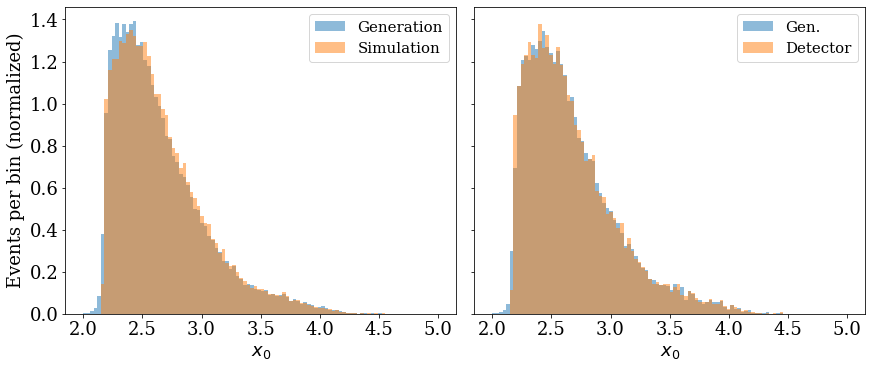

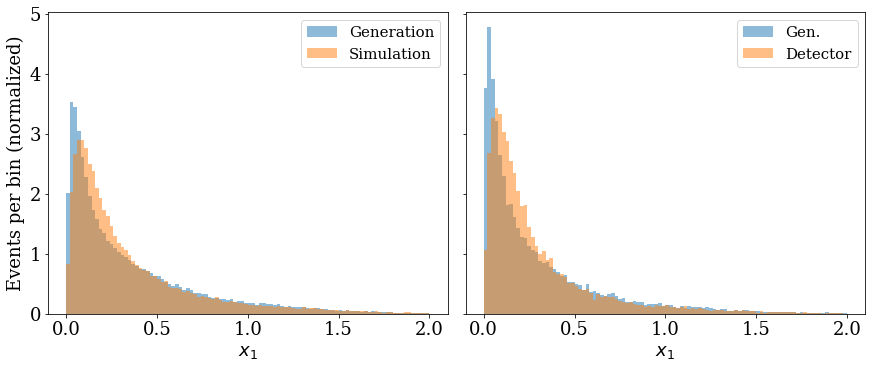

In [57]:
bins = np.linspace(2,5, 101)

fig, ax = plt.subplots(1,
                       2,
                       figsize=(12, 5),
                       constrained_layout=True,
                       sharey=True)

ax[0].set_xlabel('$x_0$')
ax[0].set_ylabel('Events per bin (normalized)')
ax[0].hist(theta0_G[theta0_G[:,0]!=-10][:,0], bins=bins, **plot_style_2, label='Generation')
ax[0].hist(theta0_S[theta0_S[:,0]!=-10][:,0], bins=bins, **plot_style_2, label='Simulation')
legend = ax[0].legend(
    loc='best',
    frameon=True)
plt.setp(legend.get_title(), multialignment='center')

ax[1].set_xlabel('$x_0$')

ax[1].hist(theta_unknown_G[theta_unknown_S[:,0]!=-10][:,0], bins=bins, **plot_style_2, label='Gen.')
legend = ax[1].legend(
    loc='best',
    frameon=True)


ax[1].hist(theta_unknown_S[theta_unknown_S[:,0]!=-10][:,0], bins=bins, **plot_style_2, label='Detector')
legend = ax[1].legend(
    loc='best',
    frameon=True)
plt.setp(legend.get_title(), multialignment='center')

fig.show()

bins = np.linspace(0,2, 101)
#bins = np.linspace(0,2, 101)
#bins = np.linspace(0,1,100)
fig, ax = plt.subplots(1,
                       2,
                       figsize=(12, 5),
                       constrained_layout=True,
                       sharey=True)

ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('Events per bin (normalized)')
ax[0].hist(theta0_G[theta0_G[:,0]!=-10][:,-1], bins=bins, **plot_style_2, label='Generation')
ax[0].hist(theta0_S[theta0_S[:,0]!=-10][:,-1], bins=bins, **plot_style_2, label='Simulation')
legend = ax[0].legend(
    loc='best',
    frameon=True)
plt.setp(legend.get_title(), multialignment='center')

ax[1].set_xlabel('$x_1$')

ax[1].hist(theta_unknown_G[theta_unknown_S[:,0]!=-10][:,-1], bins=bins, **plot_style_2, label='Gen.')
legend = ax[1].legend(
    loc='best',
    frameon=True)

ax[1].hist(theta_unknown_S[theta_unknown_S[:,0]!=-10][:,-1], bins=bins, **plot_style_2, label='Detector')
legend = ax[1].legend(
    loc='best',
    frameon=True)






plt.setp(legend.get_title(), multialignment='center')

fig.show()

## Define Multifold 

In [58]:
# Input multiple observables as tuple or list (i.e. theta0_G = (obs_1, obs_2, ...))
"""    Arguments:
        num_observables: number of observables to 
                            simultaneously unfold (integer)
                            
        iterations: number of iterations (integer)
        
        theta0_G: tuple or list of nominal 
                    generation-level observables as Numpy arrays
                    
        theta0_S: tuple or list of nominal 
                    simulation-level observables as Numpy arrays
                    
        theta_unknown_S: tuple or list of "natural" 
                            (unknown) simulation-level observables 
                            to be unfolded as Numpy arrays
        
        Returns:
        - A Numpy array of weights to reweight distributions in 
        theta0_G to the unfolded distribution of theta_unknown_S
        
        - The model used to calculate those weights
"""


def multifold(num_observables, iterations, theta0_G, theta0_S,
              theta_unknown_S):
    
    
    theta0 = np.stack([theta0_G, theta0_S], axis=1)
    labels0 = np.zeros(len(theta0))
    theta_unknown = np.stack([theta_unknown_S, theta_unknown_S], axis=1)
    labels1 = np.ones(len(theta0_G))
    labels_unknown = np.ones(len(theta_unknown_S))
    
    xvals_1 = np.concatenate((theta0_S, theta_unknown_S))
    yvals_1 = np.concatenate((labels0, labels_unknown))
    xvals_2 = np.concatenate((theta0_G, theta0_G))
    yvals_2 = np.concatenate((labels0, labels1))
    

    weights = np.empty(shape=(iterations, 2, len(theta0_G))) #this was 0
    weights_pull = np.ones(len(theta0_S))
    weights_push = np.ones(len(theta0_S))

    inputs = Input((num_observables, ))
     #inputs = Input((2, ))
    hidden_layer_1 = Dense(50, activation='relu')(inputs)
    hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
    hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
    outputs = Dense(1, activation='sigmoid')(hidden_layer_3)

    model = Model(inputs=inputs, outputs=outputs)

    earlystopping = EarlyStopping(patience=10,
                              verbose=1,
                              restore_best_weights=True)
    # from NN (DCTR) 
    def reweight(events):
        f = model.predict(events, batch_size=10000)
        weights = f / (1. - f)
        return np.squeeze(np.nan_to_num(weights))
    
    
    
    for i in range(iterations):
        print("\nITERATION: {}\n".format(i + 1))

        # STEP 1: classify Sim. (which is reweighted by weights_push) to Data
        # weights reweighted Sim. --> Data
        print("STEP 1\n")

        weights_1 = np.concatenate((weights_push, np.ones(len(theta_unknown_S))))
        # actual weights for Sim., ones for Data (not MC weights)

        X_train_1, X_test_1, Y_train_1, Y_test_1, w_train_1, w_test_1 = train_test_split(
            xvals_1, yvals_1, weights_1)

        #theta0_G[theta0_S[:,0]!=-10][:,1]
        model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
        model.fit(X_train_1[X_train_1[:,0]!=-10],
              Y_train_1[X_train_1[:,0]!=-10],
              sample_weight=w_train_1[X_train_1[:,0]!=-10],
              epochs=200,
              batch_size=10000,
              validation_data=(X_test_1[X_test_1[:,0]!=-10], Y_test_1[X_test_1[:,0]!=-10], w_test_1[X_test_1[:,0]!=-10]),
              callbacks=[earlystopping],
              verbose=1)

        weights_pull = weights_push * reweight(theta0_S)
        weights_pull[theta0_S[:,0]==-10] = 1. #these are events that don't pass reco; take the prior.
        weights[i, :1, :] = weights_pull

        # STEP 2: classify Gen. to reweighted Gen. (which is reweighted by weights_pull)
        # weights Gen. --> reweighted Gen.
        print("\nSTEP 2\n")

        weights_2 = np.concatenate((np.ones(len(theta0_G)), weights_pull))
        # ones for Gen. (not MC weights), actual weights for (reweighted) Gen.

        X_train_2, X_test_2, Y_train_2, Y_test_2, w_train_2, w_test_2 = train_test_split(
            xvals_2, yvals_2, weights_2)

        model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
        model.fit(X_train_2,
              Y_train_2,
              sample_weight=w_train_2,
              epochs=200,
              batch_size=10000,
              validation_data=(X_test_2, Y_test_2, w_test_2),
              callbacks=[earlystopping],
              verbose=1)

        weights_push = reweight(theta0_G)
        weights[i, 1:2, :] = weights_push
    return weights, model

## Unfold two variables simultaneously

In [59]:
K.clear_session()

In [60]:
iterations = 1# use ~4 iterations
num_observables= 6

weights, _ = multifold(num_observables=num_observables,
                       iterations=iterations,
                       theta0_G=theta0_G,
                       theta0_S=theta0_S,
                       theta_unknown_S= theta_unknown_S)


ITERATION: 1

STEP 1

Epoch 1/200
50/50 [==============================] - 15s 309ms/step - loss: 0.5307 - accuracy: 0.7676 - val_loss: 0.5233 - val_accuracy: 0.7675
Epoch 2/200
50/50 [==============================] - 0s 6ms/step - loss: 0.5214 - accuracy: 0.7676 - val_loss: 0.5210 - val_accuracy: 0.7675
Epoch 3/200
50/50 [==============================] - 0s 6ms/step - loss: 0.5208 - accuracy: 0.7676 - val_loss: 0.5207 - val_accuracy: 0.7675
Epoch 4/200
50/50 [==============================] - 0s 6ms/step - loss: 0.5207 - accuracy: 0.7676 - val_loss: 0.5223 - val_accuracy: 0.7675
Epoch 5/200
50/50 [==============================] - 0s 6ms/step - loss: 0.5206 - accuracy: 0.7676 - val_loss: 0.5214 - val_accuracy: 0.7675
Epoch 6/200
50/50 [==============================] - 0s 6ms/step - loss: 0.5203 - accuracy: 0.7676 - val_loss: 0.5203 - val_accuracy: 0.7675
Epoch 7/200
50/50 [==============================] - 0s 6ms/step - loss: 0.5204 - accuracy: 0.7676 - val_loss: 0.5216 - val_accu

/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in true_divide


Epoch 1/200
90/90 [==============================] - 28s 313ms/step - loss: 0.4726 - accuracy: 0.4998 - val_loss: 0.4709 - val_accuracy: 0.5006
Epoch 2/200
90/90 [==============================] - 1s 6ms/step - loss: 0.4710 - accuracy: 0.4998 - val_loss: 0.4705 - val_accuracy: 0.5006
Epoch 3/200
90/90 [==============================] - 1s 6ms/step - loss: 0.4707 - accuracy: 0.4998 - val_loss: 0.4706 - val_accuracy: 0.5006
Epoch 4/200
90/90 [==============================] - 1s 6ms/step - loss: 0.4706 - accuracy: 0.4998 - val_loss: 0.4704 - val_accuracy: 0.5006
Epoch 5/200
90/90 [==============================] - 1s 6ms/step - loss: 0.4707 - accuracy: 0.4998 - val_loss: 0.4703 - val_accuracy: 0.5006
Epoch 6/200
90/90 [==============================] - 1s 6ms/step - loss: 0.4705 - accuracy: 0.4998 - val_loss: 0.4711 - val_accuracy: 0.5006
Epoch 7/200
90/90 [==============================] - 1s 6ms/step - loss: 0.4704 - accuracy: 0.4998 - val_loss: 0.4701 - val_accuracy: 0.5005
Epoch 8/20

## Plot CLOSURE TEST RESULTS

ITERATION: 1


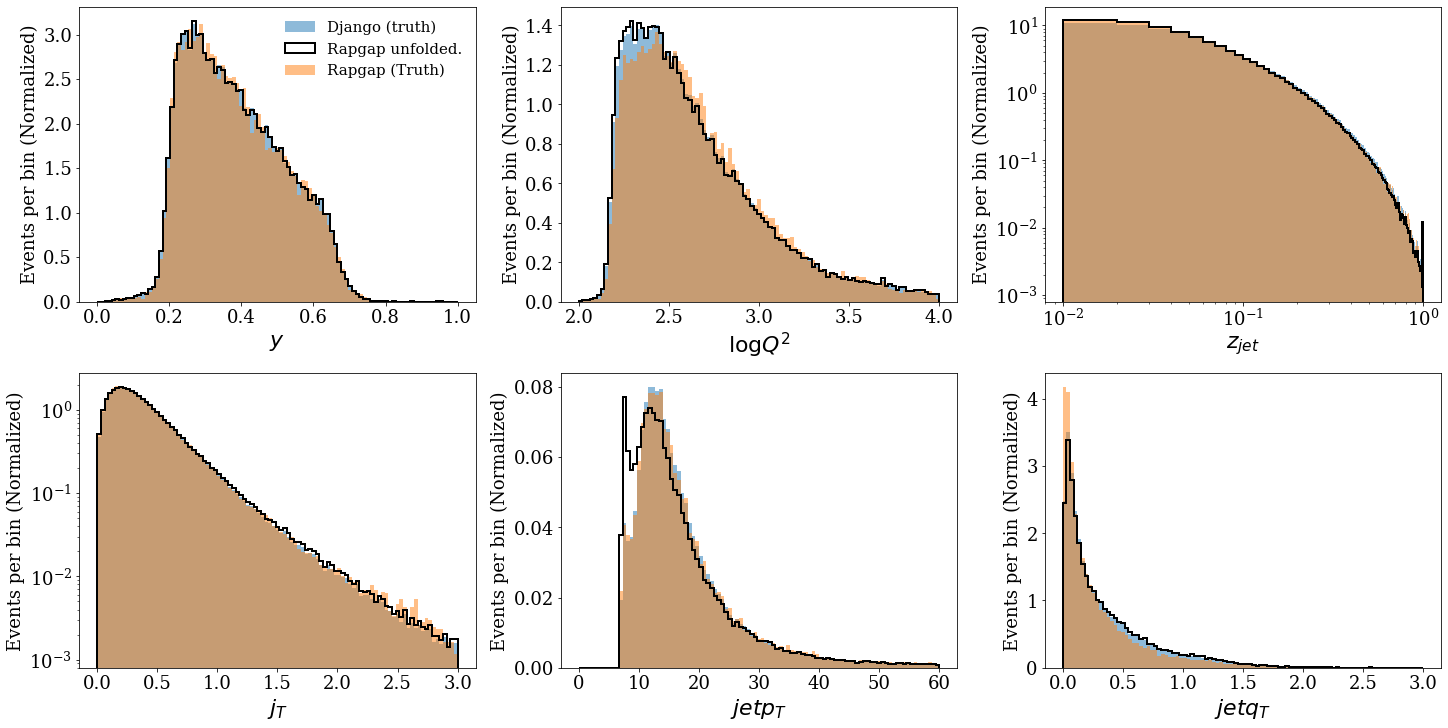

In [61]:
for i in range(len(weights)):

    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(2, 5,100 )
    #bins = np.linspace(5, 50, 45)

    fig, ax = plt.subplots(2,
                           3,
                           figsize=(20, 10),
                           constrained_layout=True)
    bins = np.linspace(0.0, 1.0,100 )

    ax[0,0].set_xlabel(r'$y$',fontsize=22)
    ax[0,0].set_ylabel('Events per bin (Normalized)')
    ax[0,0].hist(y_0_G[y_0_G!=-10], bins=bins, label=r'Django (truth)', **plot_style_2)
    ax[0,0].hist(y_0_G[y_0_G!=-10],
               bins=bins,
               weights=weights[i, 1, :][y_0_G!=-10],
               label=r'Rapgap unfolded.',
               **plot_style_1)

    ax[0,0].hist(y_unknown_G,
               bins=bins,
               label=r'Rapgap (Truth)',
               **plot_style_2)
    
    ax[0,0].legend(frameon=False)

    bins = np.linspace(2, 4,100 )

    ax[0,1].set_xlabel(r'$\log Q^{2}$',fontsize=22)
    ax[0,1].set_ylabel('Events per bin (Normalized)')
    ax[0,1].hist(Q2_0_G[Q2_0_G!=-10], bins=bins, label=r'Django (truth)', **plot_style_2)
    ax[0,1].hist(Q2_0_G[Q2_0_G!=-10],
               bins=bins,
               weights=weights[i, 1, :][Q2_0_G!=-10],
               label=r'Rapgap unfolded.',
               **plot_style_1)

    ax[0,1].hist(Q2_unknown_G,
               bins=bins,
               label=r'Rapgap (Truth)',
               **plot_style_2)
    
    
    
    bins = np.linspace(0.01,1,100 )

    ax[0,2].set_xlabel(r'$z_{jet} $',fontsize=22)
    ax[0,2].set_ylabel('Events per bin (Normalized)')
    ax[0,2].hist(z_0_G[z_0_G!=-10], bins=bins, label=r'Django (truth)', **plot_style_2)
    ax[0,2].hist(z_0_G[z_0_G!=-10],
               bins=bins,
               weights=weights[i, 1, :][z_0_G!=-10],
               label=r'Rapgap unfolded.',
               **plot_style_1)

    ax[0,2].hist(z_unknown_G,
               bins=bins,
               label=r'Rapgap (Truth)',
               **plot_style_2)
    ax[0,2].set_yscale('log')
    ax[0,2].set_xscale('log')

    
    bins = np.linspace(0,3,100 )

    ax[1,0].set_xlabel(r'$j_{T} $',fontsize=22)
    ax[1,0].set_ylabel('Events per bin (Normalized)')
    ax[1,0].hist(jt_0_G[jt_0_G!=-10], bins=bins, label=r'Django (truth)', **plot_style_2)
    ax[1,0].hist(jt_0_G[jt_0_G!=-10],
               bins=bins,
               weights=weights[i, 1, :][jt_0_G!=-10],
               label=r'Rapgap unfolded.',
               **plot_style_1)

    ax[1,0].hist(jt_unknown_G,
               bins=bins,
               label=r'Rapgap (Truth)',
               **plot_style_2)
    ax[1,0].set_yscale('log')
    
    bins = np.linspace(0,60,100 )

    ax[1,1].set_xlabel(r'$jet p_{T} $',fontsize=22)
    ax[1,1].set_ylabel('Events per bin (Normalized)')
    ax[1,1].hist(jetpt_0_G[jetpt_0_G!=-10], bins=bins, label=r'Django (truth)', **plot_style_2)
    ax[1,1].hist(jetpt_0_G[jetpt_0_G!=-10],
               bins=bins,
               weights=weights[i, 1, :][jetpt_0_G!=-10],
               label=r'Rapgap unfolded.',
               **plot_style_1)

    ax[1,1].hist(jetpt_unknown_G,
               bins=bins,
               label=r'Rapgap (Truth)',
               **plot_style_2)
    
    
    bins = np.linspace(0,3,100 )

    ax[1,2].set_xlabel(r'$jet q_{T} $',fontsize=22)
    ax[1,2].set_ylabel('Events per bin (Normalized)')
    ax[1,2].hist(jetqt_0_G[jetqt_0_G!=-10], bins=bins, label=r'Django (truth)', **plot_style_2)
    ax[1,2].hist(jetqt_0_G[jetqt_0_G!=-10],
               bins=bins,
               weights=weights[i, 1, :][jetqt_0_G!=-10],
               label=r'Rapgap unfolded.',
               **plot_style_1)

    ax[1,2].hist(jetqt_unknown_G,
               bins=bins,
               label=r'Rapgap (Truth)',
               **plot_style_2)
    
    
    
    
    

(array([1.6013676e+07, 6.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

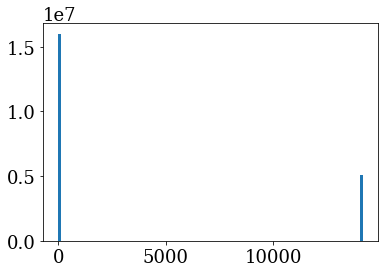

In [67]:
plt.hist(mc['track_jetpt'],bins=100)

## Compute efficiency 

In [ ]:
bins = np.linspace(0,20,100)
plt.hist(mc['genjet_pt'],bins=bins,alpha=0.3)
plt.hist(mc.query('pass_reco==1')['genjet_pt'],bins=bins,alpha=0.3)

plt.show()

In [ ]:
#numerator
mask = np.logical_and(theta0_S[:,0]!=-10,theta0_G[:,0]!=-10)
print (mask) 
num,x,_  = plt.hist(jetpt_0_G[mask], weights=weights[-1, 1, :][mask],bins=20,label='numerator, weighted',alpha=0.3)
den,x,_ = plt.hist(jetpt_0_G[theta0_G[:,0]!=-10], weights=weights[-1, 1, :][theta0_G[:,0]!=-10],bins=20,label='numerator, weighted',alpha=0.3)
x= (x[1:] + x[:-1])/2.0

#plt.hist(theta0_G[theta0_S[:,0]!=-10][:,1])
plt.show()
eff_weighted= np.true_divide(num,den)
print(sum(num))
print(sum(den))
print(sum(num)/sum(den))
#plt.legend()

ITERATION 1:


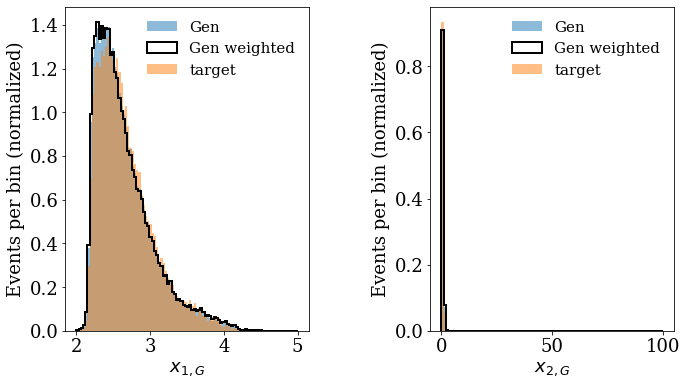

In [62]:
bins = np.linspace(2, 5, 101)

for i in range(1):
    print("ITERATION {}:".format(i + 1))
    plt.figure(figsize=(10, 5))
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    
    gs = plt.GridSpec(1, 2)
    gs.update(left=0.08, right=0.925,
              top=0.95, bottom=0.05,
              hspace=0.3, wspace=0.5)

    ax1 = plt.subplot(gs[0, 0])
    ax2 = plt.subplot(gs[0, 1])     
    
    ax1.hist(theta0_G[theta0_G[:,0]!=-10][:,0],
                     bins=bins,
                     **plot_style_2,label='Gen')

    ax1.hist(
        theta0_G[theta0_G[:,0]!=-10][:,0],
        bins=bins,
        label='Gen weighted',
        weights=weights[i, 1, :][theta0_G[:,0]!=-10],
        **plot_style_1)

    
    
    ax1.hist(
        theta_unknown_G[:,0],
        bins=bins,
        label='target', 
        **plot_style_2)
    
    ax1.legend(frameon=False)
    ax1.set(xlabel=r"$x_{1,G}$", ylabel="Events per bin (normalized)")
    
    
    ## 
    bins = np.linspace(0,100,100)
    ax2.hist(theta0_G[theta0_G[:,0]!=-10][:,-1],
                     bins=bins,
                     **plot_style_2,label='Gen')

    ax2.hist(
        theta0_G[theta0_G[:,0]!=-10][:,-1],
        bins=bins,
        label='Gen weighted',
        weights=weights[i, 1, :][theta0_G[:,0]!=-10],
        **plot_style_1)

    
    
    ax2.hist(
        theta_unknown_G[:,-1],
        bins=bins,
        label='target', 
        **plot_style_2)
    
    ax2.legend(frameon=False)
    ax2.set(xlabel=r"$x_{2,G}$", ylabel="Events per bin (normalized)")
    
    
    
    

ITERATION: 1


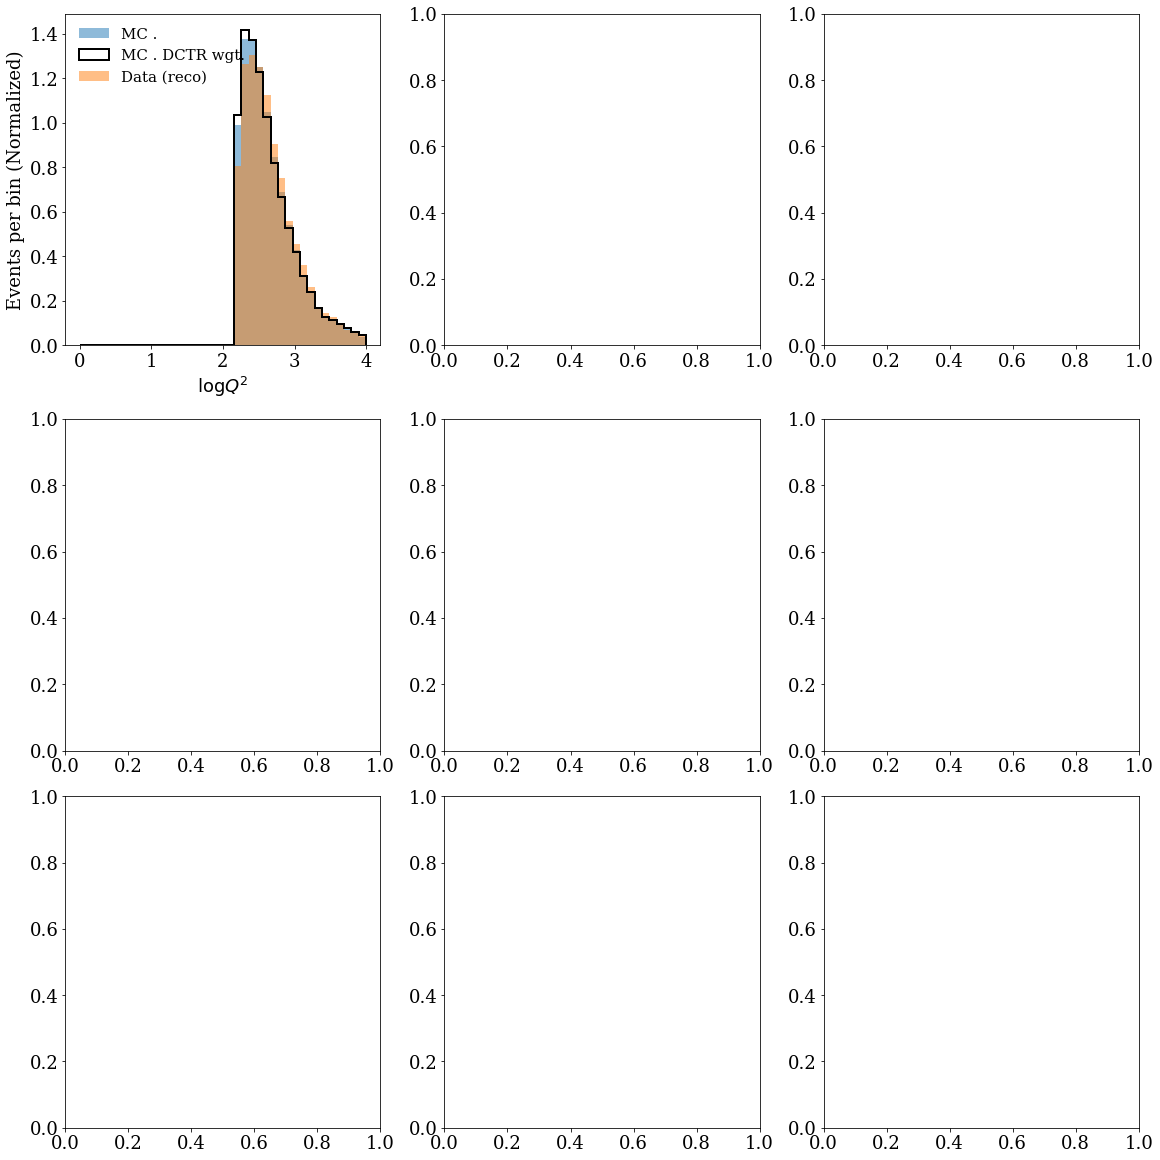

In [63]:
for i in range(len(weights)):

    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(0.0, 4.0, 40)
    
    fig, ax = plt.subplots(3,
                           3,
                           figsize=(16, 16),
                           constrained_layout=True)
    bins = np.linspace(0.0, 4.0, 40)
    ax[0,0].set_xlabel(r'$\log Q^{2}$')
    ax[0,0].set_ylabel('Events per bin (Normalized)')
    ax[0,0].hist(Q2_0_S[theta0_S[:,0]!=0], bins=bins, label=r'MC .', **plot_style_2)
    ax[0,0].hist(Q2_0_S[theta0_S[:,0]!=0],
               bins=bins,
               weights=weights[i, 0, :][theta0_S[:,0]!=0],
               label=r'MC . DCTR wgt.',
               **plot_style_1)

    ax[0,0].hist(Q2_unknown_S,
               bins=bins,
               label=r'Data (reco)',
               **plot_style_2)
    ax[0,0].legend(frameon=False,loc='best')

In [ ]:
for i in range(len(weights)):
    print(max(weights[i, 1, :]))
    print(min(weights[i, 1, :]))

In [ ]:
K.clear_session()

## Define features with data

In [ ]:
Q2_0_G = mc_cut['gen_logQ2']
Q2_0_S =mc_cut['logQ2']
Q2_unknown_S = data_cut['logQ2']

y_0_G = mc_cut['gen_y']
y_0_S =mc_cut['y']
y_unknown_S = data_cut['y']

tau1b_0_G = mc_cut['gen_tau1b']
tau1b_0_S =mc_cut['tau1b']
tau1b_unknown_S = data_cut['tau1b']

## Run unfolding on data

In [ ]:
K.clear_session()

In [ ]:
num_observables = 3

# simple / 100. standardization s.t. data is of order ~1

weights, _ = multifold(num_observables=num_observables,
                       iterations=3,
                       theta0_G=(Q2_0_G , y_0_G, tau1b_0_G ),
                       theta0_S=(Q2_0_S , y_0_S, tau1b_0_S),
                       theta_unknown_S=(Q2_unknown_S , y_unknown_S , tau1b_unknown_S))

In [ ]:
for i in range(len(weights)):
    #print (weights.shape)
    print((weights[i, :1, :]).shape)
    #print((weights[i, :1, :]).shape)
    #print((weights[i, 1:2, :][0]).shape)


print(len(weights[i, :1, :][0]))    
print(len(weights[i, 1:2, :][0]))

## MC at reco level reweighted vs data

In [ ]:
for i in range(len(weights)):

    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(2,5, 100)
    #bins = np.linspace(5, 50, 45)

    fig, ax = plt.subplots(1,
                           3,
                           figsize=(16, 5),
                           constrained_layout=True)
    ax[0].set_xlabel(r'$\log Q^{2}$',fontsize=22)
    ax[0].set_ylabel('Events per bin (Normalized)')
    ax[0].hist(Q2_0_S, bins=bins, label=r'Gen.', **plot_style_2)
    ax[0].hist(Q2_0_S,
               bins=bins,
               weights=weights[i, 0, :],
               label=r'Gen. DCTR wgt.',
               **plot_style_1)

    ax[0].hist(Q2_unknown_S,
               bins=bins,
               label=r'Data (Reco)',
               **plot_style_2)
    ax[0].legend(frameon=False)

    bins = np.linspace(-0.2,1.2, 50)
    #bins = np.linspace(0, 2.0, 40)

    ax[1].set_xlabel(r'$\tau_{1b}$',fontsize=22)
    ax[1].set_ylabel('Events per bin (Normalized)')
    ax[1].hist(tau1b_0_S, bins=bins, label=r'Gen.', **plot_style_2)
    ax[1].hist(tau1b_0_S,
               bins=bins,
               weights=weights[i, 0, :],
               label=r'Gen. DCTR wgt. = Unfolded',
               **plot_style_1)
    ax[1].hist(tau1b_unknown_S,
               bins=bins,
               **plot_style_2)
    #ax[1].legend(frameon=False)

    
    
    bins = np.linspace(0, 1.0, 50)
   # bins = np.linspace(0, 2.0, 40)

    ax[2].set_xlabel(r'$y$',fontsize=22)
    ax[2].set_ylabel('Events per bin (Normalized)')
    ax[2].hist(y_0_S, bins=bins, label=r'Gen.', **plot_style_2)
    ax[2].hist(y_0_S,
               bins=bins,
               weights=weights[i, 0, :],
               label=r'Gen. DCTR wgt.',
               **plot_style_1)
    ax[2].hist(y_unknown_S,
               bins=bins,
               **plot_style_2)
    #ax[2].legend(frameon=False)
 
    
    
    
    fig.show()
    plt.show()

## Plot unfolded results

In [ ]:
for i in range(len(weights)):

    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(0,1.2, 50)


    fig, ax = plt.subplots(1,
                           3,
                           figsize=(16, 5),
                           constrained_layout=True)
    ax[0].set_xlabel(r'$\tau_{1b}$',fontsize=22)
    ax[0].set_ylabel('Events per bin (Normalized)')
    ax[0].hist(tau1b_0_G, bins=bins, label='Gen', **plot_style_2)
    ax[0].hist(tau1b_0_G,
               bins=bins,
               weights=weights[i, 1:2, :][0],
               label=r'unfolded',
               **plot_style_1)

    ax[0].hist(tau1b_unknown_S,
               bins=bins,
               label=r'Data (reco)',
               **plot_style_2)
    ax[0].legend(frameon=False)


    
    bins = np.linspace(2,5, 100)

    ax[1].set_xlabel(r'$\log Q^{2}$',fontsize=22)
    ax[1].set_ylabel('Events per bin (Normalized)')
    ax[1].hist(Q2_0_G, bins=bins, label=r'MC (reco)', **plot_style_2)
    ax[1].hist(Q2_0_G,
               bins=bins,
               weights=weights[i, 1:2, :][0],
               label=r'MC DCTR wgt. = Unfolded',
               **plot_style_1)
    ax[1].hist(Q2_unknown_S,
               bins=bins,
               **plot_style_2)

    
    
    bins = np.linspace(0, 1.0, 50)

    ax[2].set_xlabel('y',fontsize=22)
    ax[2].set_ylabel('Events per bin (Normalized)')
    ax[2].hist(y_0_G, bins=bins, label=r'MC (reco)', **plot_style_2)
    ax[2].hist(y_0_G,
               bins=bins,
               weights=weights[i, 1:2, :][0],
               label=r'MC DCTR wgt.',
               **plot_style_1)
    ax[2].hist(y_unknown_S,
               bins=bins,
               **plot_style_2)

    
    
    
    fig.show()
    plt.show()

## Create dataframe that includes weights

In [ ]:
d = {'logQ2': Q2_0_G, 'y': y_0_G, 'tau1b': tau1b_0_G, 'weights': weights[i,1,:]}
df = pd.DataFrame(data=d)



## Plot data, and unfolded results and MC truth

In [ ]:
bins = np.linspace(-0.2,1.2 ,100)

#plt.hist(df.query('e_pt>15 and e_pt<20')['dphi'],
#               bins=bins,
#               weights=df.query('e_pt>15 and e_pt<20')['weights'],
#               label=r'Gen. DCTR wgt.',
#               **plot_style_1)



fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})

nbins = 36#36
minimo = 2.8
for counter,edges in enumerate([(2,2.5), (2.5,3.0),(3.0,4.0)]):
    cut = ' logQ2 > %2.2f and logQ2 <%2.2f'%(edges[0],edges[1])
    df_cut = df.query(cut)
    #printSummary(df_cut)
    print ('###########')
    axs[counter].xaxis.set_label_text('tau1b', fontsize=25)
    axs[counter].xaxis.set_label_text('tau1b', fontsize=25)

    ##Plot data
    #Nelectrons = df.query(cut).shape[0]
    axs[counter].hist(df_cut['tau1b'],bins=bins,density=True,label='MC true',alpha=0.3)
    axs[counter].hist(data_cut.query(cut)['tau1b'],bins=bins,alpha=0.9,density=True, label='Data reco',color='black',lw=3,histtype='step')

    axs[counter].hist(df_cut['tau1b'],bins=bins,weights=df_cut['weights'],density=True,label = 'Unfolded',alpha=0.3)

    axs[counter].legend(prop={'size': 20}, frameon=False, loc='upper left')
    axs[counter].set_title(r' $ %2.0f< $log Q^{2}$ < %2.0f$'%(edges[0],edges[1]))

    #axs[counter].text(1.5,2.9,  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(data_cut.query(cut)['x'].mean(), data_cut.query(cut)['Q2'].mean()), fontsize=18)
    #plt.yscale('log')
    
axs[0].yaxis.set_label_text('Normalized entries', fontsize=25)


## Bootstrapping

In [ ]:
## define MC first, these will be the same always

In [ ]:
Q2_0_G = mc_cut['gen_logQ2']
Q2_0_S =mc_cut['logQ2']

y_0_G = mc_cut['gen_y']
y_0_S =mc_cut['y']

tau1b_0_G = mc_cut['gen_tau1b']
tau1b_0_S =mc_cut['tau1b']


In [ ]:
data_cut.head()

In [ ]:
K.clear_session()

In [ ]:
bootstraps = 20
iterations = 6 
nvariables = 3
weights = [] 

import timeit


for i in range(bootstraps):
    start = timeit.timeit()

    print ('%i th jackknifedata'%i)
    
    ## define the data input for the unfolding
    #bootstrap_data = data_cut.sample(data_cut.shape[0], replace=True)
    #add Poisson variation of total number of data events used:
    bootstrap_data = data_cut.sample(np.random.poisson(data_cut.shape[0],1)[0], replace=True)
    
    Q2_unknown_S    = bootstrap_data['logQ2']
    y_unknown_S     = bootstrap_data['y']
    tau1b_unknown_S = bootstrap_data['tau1b']
    
    num_observables = 3
    i_weight, _ = multifold(num_observables=num_observables,
                       iterations=iterations,
                       theta0_G=(Q2_0_G, y_0_G, tau1b_0_G),
                       theta0_S=(Q2_0_S, y_0_S, tau1b_0_S),
                       theta_unknown_S=(Q2_unknown_S,y_unknown_S,tau1b_unknown_S)
                      )
    
    weights.append(i_weight)
    end = timeit.timeit()
    print(end - start)


In [ ]:
for i in range(30):
    start = timeit.timeit()

    print ('%i th jackknifedata'%i)
    
    ## define the data input for the unfolding
    #bootstrap_data = data_cut.sample(data_cut.shape[0], replace=True)
    #add Poisson variation of total number of data events used:
    bootstrap_data = data_cut.sample(np.random.poisson(data_cut.shape[0],1)[0], replace=True)
    
    Q2_unknown_S    = bootstrap_data['logQ2']
    y_unknown_S     = bootstrap_data['y']
    tau1b_unknown_S = bootstrap_data['tau1b']
    
    num_observables = 3
    i_weight, _ = multifold(num_observables=num_observables,
                       iterations=iterations,
                       theta0_G=(Q2_0_G, y_0_G, tau1b_0_G),
                       theta0_S=(Q2_0_S, y_0_S, tau1b_0_S),
                       theta_unknown_S=(Q2_unknown_S,y_unknown_S,tau1b_unknown_S)
                      )
    
    weights.append(i_weight)
    end = timeit.timeit()
    print(end - start)

In [ ]:
for i in range(50):
    start = timeit.timeit()

    print ('%i th jackknifedata'%i)
    
    ## define the data input for the unfolding
    #bootstrap_data = data_cut.sample(data_cut.shape[0], replace=True)
    #add Poisson variation of total number of data events used:
    bootstrap_data = data_cut.sample(np.random.poisson(data_cut.shape[0],1)[0], replace=True)
    
    Q2_unknown_S    = bootstrap_data['logQ2']
    y_unknown_S     = bootstrap_data['y']
    tau1b_unknown_S = bootstrap_data['tau1b']
    
    num_observables = 3
    i_weight, _ = multifold(num_observables=num_observables,
                       iterations=iterations,
                       theta0_G=(Q2_0_G, y_0_G, tau1b_0_G),
                       theta0_S=(Q2_0_S, y_0_S, tau1b_0_S),
                       theta_unknown_S=(Q2_unknown_S,y_unknown_S,tau1b_unknown_S)
                      )
    
    weights.append(i_weight)
    end = timeit.timeit()
    print(end - start)

In [ ]:
print(len(weights))

# for k in range(bootstraps):
#    for i in range(len(weights[k])):
        #print (weights[k].shape)
        #print((weights[k][i, 1, :]).shape)
        #print((weights[k][i, 1, :]).shape)
        #print((weights[k][i, 1:2, :][0]).shape)
print(myns[:,1])

In [ ]:
covariance_matrices = []
for it in range(6):
    myns = []
    #bins = np.logspace(np.log10(0.1),np.log10(1.0),8)
    #bins = np.logspace(np.log10(0.1),np.log10(np.pi),20)
    #bins = np.array([0.0, 2.05491515, 2.45354097, 2.63853135,
    #                 2.8145858,  2.98213597, 3.14159265])

    bins = np.logspace(0,1.2,100)
    #bins = np.flip(2*np.pi - np.logspace(np.log10(np.pi),np.log10(2*np.pi),15)) 

    #bins = np.logspace(np.log(1.0),np.log10(5.0),12) -1
    #bins = np.array([0., 0.1,0.2, 0.33994032, 0.55105852  ,1.07832585,2.0])
    #bins = np.flip( 2- np.logspace(np.log10(1),np.log10(2.0),5)) 

    #bins = np.append(bins,inf)

    for k in range(len(weights)-2):
        n,b,_ = plt.hist(tau1b_0_S,bins=bins,weights=weights[k][it, 1, :],alpha=0.3)
        myns+=[n]
        pass
    myns = np.array(myns)
    #print(myns)
    plt.xlabel('tau1b')

    cov = np.array([[np.mean((myns[:,j] - np.mean(myns[:,j]))*(myns[:,i] - np.mean(myns[:,i]))) for i in range(len(myns[0]))] for j in range(len(myns[0]))])
    corr = np.array([[cov[i,j]/(np.sqrt(cov[i,i])*np.sqrt(cov[j,j])) for i in range(len(myns[0]))] for j in range(len(myns[0]))])

    covariance_matrices.append(corr)
    #fig, ax = plt.subplots() 
    #im = ax.imshow(corr,cmap='RdBu', vmin=0.0, vmax=1.0,
    #                         interpolation='none')
    #fig.colorbar(im,ax=ax)

print(covariance_matrices[0])
plt.show()

#print (len(myns))
#print (len(myns[0]))

In [ ]:
#bins = np.flip(2*np.pi - np.logspace(np.log10(np.pi),np.log10(2*np.pi),15)) 
#
#bins = np.array([0.0,1.37784484, 1.84030237, 2.05491515, 2.25916109, 2.45354097, 2.63853135,
# 2.8145858,  2.98213597, 3.14159265])
bins = np.linspace(0,1.0,100)#print(bins)
n,b,_ = plt.hist(tau1b_0_G,bins=bins,weights=weights[0][-1, 1, :],alpha=0.3)
#plt.yscale('log')
#plt.xscale('log')

In [ ]:
bins = np.logspace(np.log(1.0),np.log10(2.0),9) -1
print(bins)
n,b,_ = plt.hist(z_0_G,bins=bins,weights=weights[0][-1, 1, :],alpha=0.3)

In [ ]:
weights[75][it, 1, :] = 0

In [ ]:
for k in range(80):
    n,b,_ = plt.hist(qt_0_S,bins=bins,weights=weights[k][-1, 1, :],alpha=0.3)

In [ ]:
print(covariance_matrices[0])
print(covariance_matrices[1])
print(covariance_matrices[2])


In [ ]:
fig, ax = plt.subplots(2,3,figsize=(12,12)) 
minimo =-.40
maximo = 1.0
im = ax[0,0].imshow(covariance_matrices[0],cmap='RdBu', vmin=minimo, vmax=1.0,
                             interpolation='none')
im = ax[0,1].imshow(covariance_matrices[1],cmap='RdBu', vmin=minimo, vmax=1.0,
                             interpolation='none')
im = ax[0,2].imshow(covariance_matrices[2],cmap='RdBu', vmin=minimo, vmax=1.0,
                  interpolation='none')
im = ax[1,0].imshow(covariance_matrices[3],cmap='RdBu', vmin=minimo, vmax=1.0,
                  interpolation='none')
im = ax[1,1].imshow(covariance_matrices[4],cmap='RdBu', vmin=minimo, vmax =1.0,
                  interpolation='none')
im = ax[1,2].imshow(covariance_matrices[5],cmap='RdBu', vmin=minimo, vmax=1.0,
                  interpolation='none')


ax[0,0].set_title('iteration #0')
ax[0,1].set_title('iteration #1')
ax[0,2].set_title('iteration #2')
ax[1,0].set_title('iteration #3')
ax[1,1].set_title('iteration #4')
ax[1,2].set_title('iteration #5')


plt.colorbar(im,ax=ax)
plt.show()

In [ ]:
covariance_matrices[4]

In [ ]:
from numpy.linalg import inv
x = [] 
rhos= []
for it in range(6): #iterations
    temp = []
    cov = np.matrix(covariance_matrices[it])
    inversecov = inv(cov)
    for i in range(cov.shape[0]):
         if(cov[i,i]*inversecov[i,i]!=0):
            temp.append( np.sqrt(1- 1.0/(cov[i,i]*inversecov[i,i])))
    rho_it = np.average(temp)
    rhos.append(rho_it)
    x.append(it)
    print (rho_it)
print (x)
print (rhos)

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(x,rhos,'-o')
plt.xlabel('Number of Multifold iterations',fontsize=20)
plt.ylabel('Mean global-correlation coefficient',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

In [ ]:
cov = np.array([[np.mean((myns[:,j] - np.mean(myns[:,j]))*(myns[:,i] - np.mean(myns[:,i]))) for i in range(len(myns[0]))] for j in range(len(myns[0]))])

In [ ]:
corr = np.array([[cov[i,j]/(np.sqrt(cov[i,i])*np.sqrt(cov[j,j])) for i in range(len(myns[0]))] for j in range(len(myns[0]))])

In [ ]:
fig, ax = plt.subplots() 
im = ax.imshow(corr,cmap='RdBu', vmin=0.0, vmax=1.0,
                             interpolation='none')
fig.colorbar(im,ax=ax)
plt.show()

In [ ]:
print(corr)

In [ ]:

l = dphi_unknown_S
for i in range(10):
    ll = np.random.choice(l, size=l.shape, replace=False) 
    print(ll)
    print(len(ll))

In [ ]:
np.mean(ll)